<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Netflix_2015_logo.svg/1280px-Netflix_2015_logo.svg.png" alt="Sample Image" width="40%" height="100;">

#**Netflix Business Case Analysis using Python**
-by Aditya Das

**Introduction:**

Netflix is one of the most popular media and video streaming platforms that offers a wide variety of award winning TV series, movies documentaries, anime and much more.
Netflix primarily distributes original and acquired films and TV shows from various genres, and it is available internationally in multiple languages.
Currently Netflix supports around 45 languages.
It stands true to it's tagline "Watch what you want, when you want" as it provides a wide range of content in a single application for the subscribers to "Netflix and Chill" as per their free time.
That's the same reason why the Netflix's Tudum is a sound which people of different generations would love to hear on a weekend.

**Data set:**

The data is available in the csv file :

•	**Show ID :** The ID of the show

•	**Type:** Identifier - A Movie or TV Show

•	**Title:** Title of the Movie / Tv Show

•	**Director:** Director of the Movie

•	**Cast:** Actors involved in the movie/show

•	**Country:** Country where the movie/show was produced

•	**Date_added:** Date it was added on Netflix

•	**Release_year:** Actual Release year of the movie/show

•	**Rating:** TV Rating of the movie/show

•	**Duration:** Total Duration - in minutes or number of seasons

•	**Listed_in:** Genre

•	**Description:** The summary description


#Data Familiarization and Cleaning

In [ ]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the Data Set
df=pd.read_csv('netflix.csv')
df_main=pd.read_csv('netflix.csv')
df.shape

(8807, 12)

In [ ]:
#Coverting String to date time format
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
#Familiarizing with the different columns of the table
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#Checking for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
#Dropping rows 'date_added','rating','duration' with NULL values since there are very less number of rows which fall in that category
df.dropna(subset=['date_added','rating','duration'], inplace=True)

#Updating empty rows of 'cast', 'director' and 'country' column to 'UNKNOWN' as there are a large number of rows which have similar data
df['cast']=df['cast'].fillna('UNKNOWN')
df['director']=df['director'].fillna('UNKNOWN')
df['country']=df['country'].fillna('UNKNOWN')

In [ ]:
#Checking the info after the data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


#Finding the counts of each categorical variable both using graphical and nongraphical analysis.

In [ ]:
#Finding the years when the TV Shows/Movies were added in Netflix and the number of content added
df_addedyear=df
df_addedyear['added_year']=df_addedyear['date_added'].dt.year
df_addedyear['added_year'].value_counts(dropna=False)

2019    2016
2020    1879
2018    1648
2021    1498
2017    1185
2016     426
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: added_year, dtype: int64

**Interpretation:**

The above data shows that the overall growth of content for Netflix has been explonential since 2010, specially between 2016 and 2017.

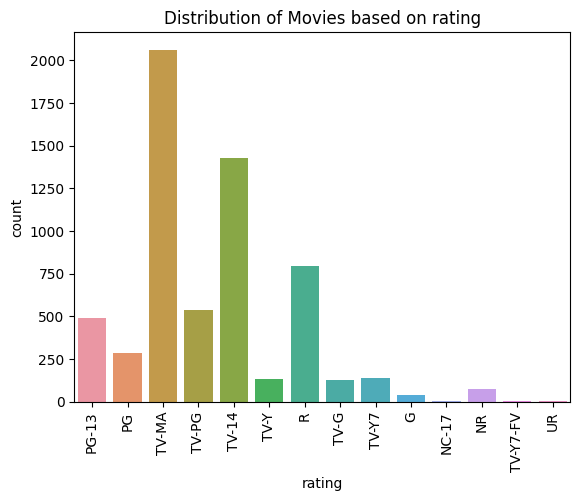

In [ ]:
#Distribution of Movies based on rating
sns.countplot(data=df[df['type']=='Movie'],x='rating')
plt.xticks(rotation=90)
plt.title("Distribution of Movies based on rating")
plt.show()

**Interpretation:**

The movies avaiable in Netflix are majorly in the rating category: TV-MA, TV-14, R.

Hence, the target audience for Netflix are majorly the teenagers and adults.

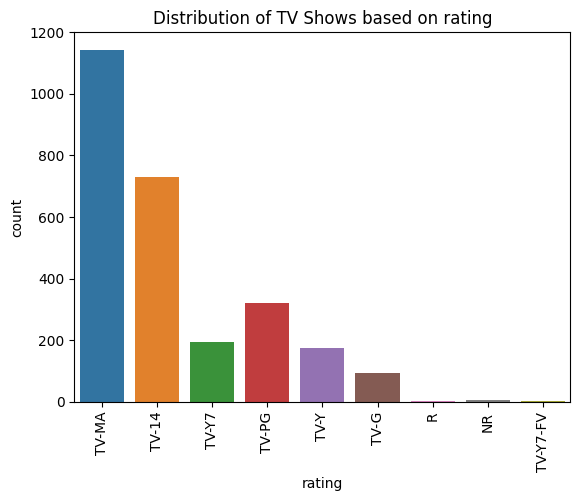

In [ ]:
#Distribution of TV Shows based on rating
sns.countplot(data=df[df['type']=='TV Show'],x='rating')
plt.xticks(rotation=90)
plt.title("Distribution of TV Shows based on rating")
plt.show()

**Interpretation:**

The TV Shows avaiable in Netflix are majorly in the rating category: TV-MA, TV-14, TV-PG.

Hence, the target audience for Netflix are majorly the teenagers and adults.

In [ ]:
df['type'].value_counts(dropna=False)

Movie      6126
TV Show    2664
Name: type, dtype: int64

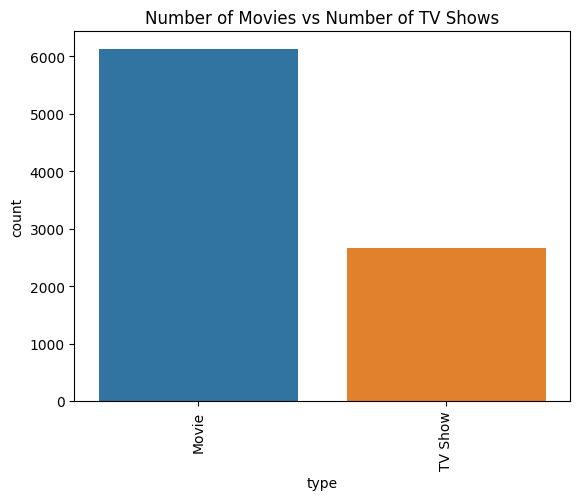

In [ ]:
#Number of Movies vs Number of TV Shows
sns.countplot(data=df,x='type')
plt.xticks(rotation=90)
plt.title("Number of Movies vs Number of TV Shows")
plt.show()

**Interpretation:**

The number of movies available in Netflix are almost three times the number of TV Shows available.

In [ ]:
df['country'].value_counts(dropna=False)

United States                             2809
India                                      972
UNKNOWN                                    829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

**Interpretation:**

Majority of the TV Shows/Movies were produced in United States, followed by India and United Kingdom.


In [ ]:
df['director'].value_counts(dropna=False)

UNKNOWN                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

**Interpretation:**

The list of directors and the movies produced potrays the diversity in the collection of the content in Netflix.
Rajiv Chilaka, Raul Campos, Jan Suter and Suhas Kadav have obtained the top postitions in the list.

**Recommendations:**

1. The content of movies and TV shows is majorly from the United States and other European countries. Netflix should also try to increase the content with respect to the Asian and African countries

2. Considering the increasing popularity of Japanese anime and Korean drama among the teenagers and adults, the content from Asia would be a good source of revenue.

In [ ]:
#Spliting the columns 'country', 'director', 'cast', 'listed_in' to split the data in the rows with multiple entries separated by a comma and a space
df_country=df
df_director=df
df_cast=df
df_genre=df
df_country['country'] = df_country['country'].str.split(', ')
df_director['director'] = df_director['director'].str.split(', ')
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_genre['listed_in']=df_genre['listed_in'].str.split(', ')

In [ ]:
#Moving the splitted data into separate rows
df_country=df_country.explode('country')
df_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[UNKNOWN],United States,2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",UNKNOWN,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,[UNKNOWN],[UNKNOWN],UNKNOWN,2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,[UNKNOWN],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,[UNKNOWN],[UNKNOWN],UNKNOWN,2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",2020


In [ ]:
#Moving the splitted data into separate rows
df_director=df_director.explode('director')
df_director

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[UNKNOWN],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,UNKNOWN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,UNKNOWN,[UNKNOWN],[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,UNKNOWN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,UNKNOWN,[UNKNOWN],[UNKNOWN],2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",2020


In [ ]:
#Moving the splitted data into separate rows
df_cast=df_cast.explode('cast')
df_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],UNKNOWN,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],Ama Qamata,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],Khosi Ngema,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],Gail Mabalane,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],Thabang Molaba,[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,[Mozez Singh],Manish Chaudhary,[India],2019-03-02,2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...,2019
8806,s8807,Movie,Zubaan,[Mozez Singh],Meghna Malik,[India],2019-03-02,2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...,2019
8806,s8807,Movie,Zubaan,[Mozez Singh],Malkeet Rauni,[India],2019-03-02,2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...,2019
8806,s8807,Movie,Zubaan,[Mozez Singh],Anita Shabdish,[India],2019-03-02,2015,TV-14,111 min,"[Dramas, International Movies, Music & Musicals]",A scrappy but poor boy worms his way into a ty...,2019


In [ ]:
#Moving the splitted data into separate rows
df_genre=df_genre.explode('listed_in')
df_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[UNKNOWN],[United States],2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",[India],2019-03-02,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...,2019
8806,s8807,Movie,Zubaan,[Mozez Singh],"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...",[India],2019-03-02,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...,2019


#Comparison of TV Shows vs. Movies.

In [ ]:
#Finding the number of movies produced in each country and pick the top 10 countries.
df_country[(df_country['type']=='Movie') & (df_country['country']!='UNKNOWN')]['country'].value_counts(dropna=False,ascending=False)[:10]

United States     2748
India              962
United Kingdom     532
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Name: country, dtype: int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_movieCountry = pd.DataFrame(data=df_country[(df_country['type']=='Movie') & (df_country['country']!='UNKNOWN')]['country'].value_counts(dropna=False, ascending=False)[:10]).reset_index()
df_movieCountry.rename(columns={'index':'country', 'country':'count'},inplace=True)
df_movieCountry

,country,count
0,United States,2748
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


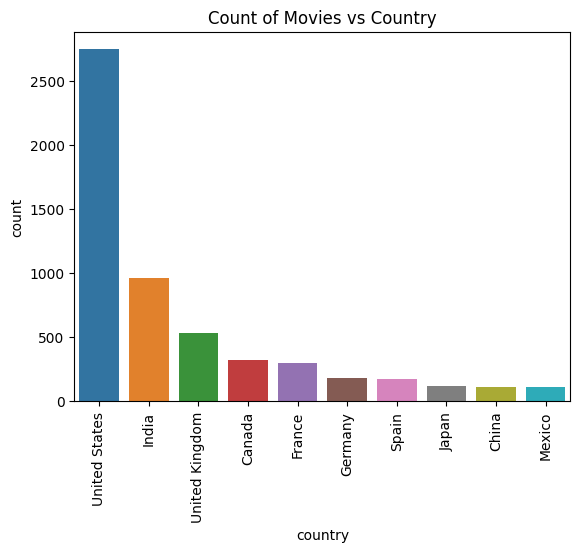

In [ ]:
#Plotting a graph to display Count of Movies vs Country
sns.barplot(data=df_movieCountry,x='country', y='count')
plt.xticks(rotation=90)
plt.title("Count of Movies vs Country")
plt.show()

**Interpretation:**

The above graph shows that the majority of the Movies available in Netflix is produced in the United States followed by India, United Kingdom and Canada.
This shows that the movies available in Netflix are majorly from the western counties.
Fromn the countries in the east, India, Japan and China are in the top 10 with respect to their native content available in Netflix

In [ ]:
#2b. Find the number of TV-Shows produced in each country and pick the top 10 countries.
df_country[(df_country['type']=='TV Show') & (df_country['country']!='UNKNOWN')]['country'].value_counts(dropna=False,ascending=False)[:10]

United States     932
United Kingdom    271
Japan             197
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          64
Spain              61
Name: country, dtype: int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_TVCountry = pd.DataFrame(data=df_country[(df_country['type']=='TV Show') & (df_country['country']!='UNKNOWN')]['country'].value_counts(dropna=False, ascending=False)[:10]).reset_index()
df_TVCountry.rename(columns={'index':'country', 'country':'count'},inplace=True)
df_TVCountry

,country,count
0,United States,932
1,United Kingdom,271
2,Japan,197
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,64
9,Spain,61


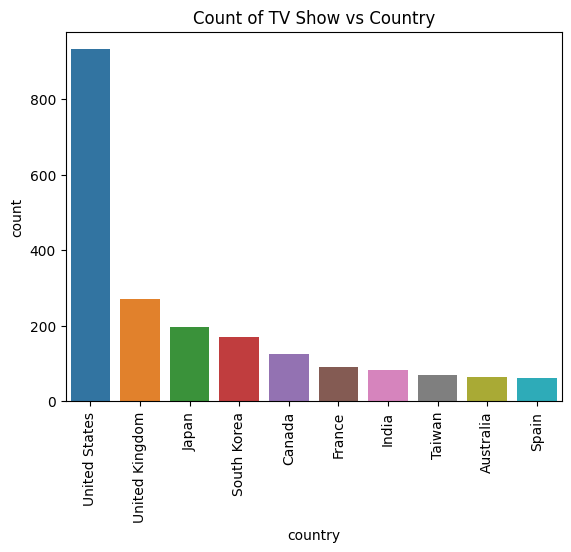

In [ ]:
#Plotting a graph to display Count of TV Show vs Country
sns.barplot(data=df_TVCountry,x='country', y='count')
plt.xticks(rotation=90)
plt.title("Count of TV Show vs Country")
plt.show()

**Interpretation:**

The above graph shows that the majority of the Movies available in Netflix is produced in the United States followed by United Kingdom, Japan and South Korea.

Unlike movies which is mainly dominated by western countries, the TV Series available in Netflix displays the optimal diversity.

Asian countries like Japan and South Korea being in the top 5 in the list speaks well about the growing popularity of anime (Japan) and Korean drama.

**Recommendations:**

1. It is quite evident that the movies available in Netflix are majorly from the United States and European countries. Although India ranks at number 2 in the list, there is a scope of addition of unconventional movies which lacked recognition during previous times when the movies were not easily accessible. This would also increase the popularity of Netflix among the aged people. This would support the idea of a Family Plan Subscription.

2. Japan and South Korea are leading in terms of the TV Shows produced but not in movies. So the potential of the movies are yet to be uncovered.

3. Netflix should include more content from developing countries like in Africa to promote their cultural heritage. Also, subcription should be made cheaper than other countries to promote the same.

#Finding the best time to launch a Movie/TV show?

In [ ]:
#Extracting week from date
df_week=df
df_week['date_added'] = pd.to_datetime(df_week['date_added'])
df_week['week_number'] = df_week['date_added'].dt.isocalendar().week
df_week

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,week_number
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[UNKNOWN],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,38
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021,38
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021,38
3,s4,TV Show,Jailbirds New Orleans,[UNKNOWN],[UNKNOWN],[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021,38
4,s5,TV Show,Kota Factory,[UNKNOWN],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019,47
8803,s8804,TV Show,Zombie Dumb,[UNKNOWN],[UNKNOWN],[UNKNOWN],2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2019,27
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019,44
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",2020,2


In [ ]:
#Extracting month from date
df_month=df
df_month['date_added'] = pd.to_datetime(df_month['date_added'])
df_month['month'] = df_month['date_added'].dt.month
df_month

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,week_number,month
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[UNKNOWN],[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",2021,38,9
1,s2,TV Show,Blood & Water,[UNKNOWN],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t...",2021,38,9
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...,2021,38,9
3,s4,TV Show,Jailbirds New Orleans,[UNKNOWN],[UNKNOWN],[UNKNOWN],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",2021,38,9
4,s5,TV Show,Kota Factory,[UNKNOWN],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...,2021,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],2019-11-20,2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",2019,47,11
8803,s8804,TV Show,Zombie Dumb,[UNKNOWN],[UNKNOWN],[UNKNOWN],2019-07-01,2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g...",2019,27,7
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],2019-11-01,2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,2019,44,11
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],2020-01-11,2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",2020,2,1


In [ ]:
#Finding the best week to release the Tv-show or the movie.
#I. Best Week to release Movies
df_week[df_week['type']=='Movie']['week_number'].value_counts(ascending=False)[:10]

1     316
44    243
40    215
9     206
26    195
35    189
31    185
13    174
18    173
27    154
Name: week_number, dtype: Int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_MovieWeek = pd.DataFrame(data=df_week[df_week['type']=='Movie']['week_number'].value_counts(ascending=False)[:10]).reset_index()
df_MovieWeek.rename(columns={'index':'week_number', 'week_number':'count'},inplace=True)
df_MovieWeek

,week_number,count
0,1,316
1,44,243
2,40,215
3,9,206
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


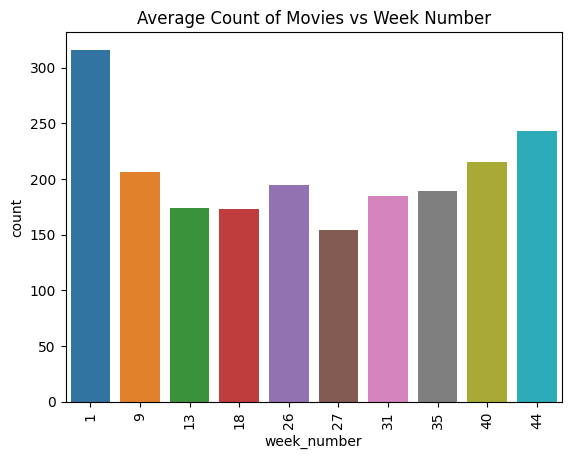

In [ ]:
#Plotting a graph to display Average Count of Movies vs Week number
sns.barplot(data=df_MovieWeek,x='week_number', y='count')
plt.xticks(rotation=90)
plt.title("Average Count of Movies vs Week Number")
plt.show()

**Interpretation:**

The above graph shows that the best week to release a movie is the first week of the year when mostly everyone celebrates New year with close ones.

Week 40 and 44 are also a good time to release movies due to the gradual onset of the festive season.

Week 26 and 27 are also great times to release a movie as we will have a safer window due to adjacent weeks.

In [ ]:
#II. Best Week to release TV Show
df_week[df_week['type']=='TV Show']['week_number'].value_counts(ascending=False)[:10]

27    86
31    83
13    76
44    75
24    75
35    74
26    73
40    72
5     72
50    70
Name: week_number, dtype: Int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_TVWeek = pd.DataFrame(data=df_week[df_week['type']=='TV Show']['week_number'].value_counts(ascending=False)[:10]).reset_index()
df_TVWeek.rename(columns={'index':'week_number', 'week_number':'count'},inplace=True)
df_TVWeek

,week_number,count
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,26,73
7,40,72
8,5,72
9,50,70


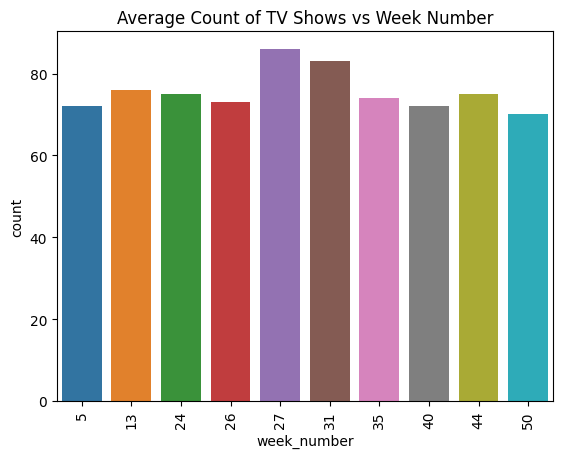

In [ ]:
#Plotting a graph to display Average Count of Movies vs Week number
sns.barplot(data=df_TVWeek,x='week_number', y='count')
plt.xticks(rotation=90)
plt.title("Average Count of TV Shows vs Week Number")
plt.show()

**Interpretation:**

The above graph shows that the best week to release a TV Series is the 27th week of the year.

Week 26 and 27 are also great times to release a movie as we will have a safer window due to adjacent weeks.

In [ ]:
#Finding the best month to release the Tv-show or the movie.
#I. Best Month to release Movies
df_month[df_month['type']=='Movie']['month'].value_counts(ascending=False)

7     565
4     549
12    547
1     545
10    545
3     528
9     518
8     518
11    498
6     492
5     439
2     382
Name: month, dtype: int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_MovieMonth = pd.DataFrame(data=df_month[df_month['type']=='Movie']['month'].value_counts(ascending=False)).reset_index()
df_MovieMonth.rename(columns={'index':'month', 'month':'count'},inplace=True)
df_MovieMonth

,month,count
0,7,565
1,4,549
2,12,547
3,1,545
4,10,545
5,3,528
6,9,518
7,8,518
8,11,498
9,6,492


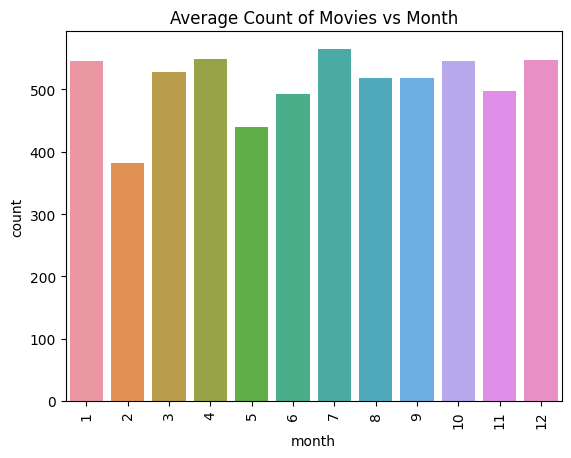

In [ ]:
#Plotting a graph to display Average Count of Movies vs Month number
sns.barplot(data=df_MovieMonth,x='month', y='count')
plt.xticks(rotation=90)
plt.title("Average Count of Movies vs Month")
plt.show()

**Interpretation:**

The best month to release a movie is July.

December and January are also good times to release movies.

In [ ]:
#II. Best Month to release TV Show
df_month[df_month['type']=='TV Show']['month'].value_counts(ascending=False)

12    265
7     262
9     251
8     236
6     236
10    215
4     214
3     213
11    207
5     193
1     192
2     180
Name: month, dtype: int64

In [ ]:
#Converting the required data to the required data frame with the required columns
df_TVMonth = pd.DataFrame(data=df_month[df_month['type']=='TV Show']['month'].value_counts(ascending=False)).reset_index()
df_TVMonth.rename(columns={'index':'month', 'month':'count'},inplace=True)
df_TVMonth

,month,count
0,12,265
1,7,262
2,9,251
3,8,236
4,6,236
5,10,215
6,4,214
7,3,213
8,11,207
9,5,193


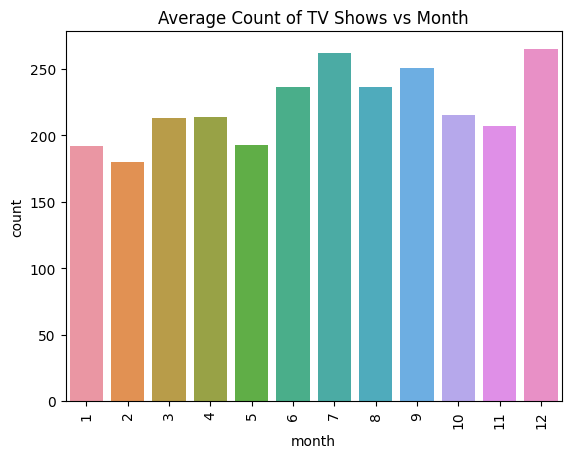

In [ ]:
#Plotting a graph to display Average Count of Movies vs Month number
sns.barplot(data=df_TVMonth,x='month', y='count')
plt.xticks(rotation=90)
plt.title("Average Count of TV Shows vs Month")
plt.show()

**Interpretation:**

The best month to release a TV Show is December.

July is also good time to release TV Series.

**Recommendations:**

Since the best time to release a Movie or TV Series is July and December, the content should be updated quickly in Netflix during that time.

Also, better offers for yearly pack should be provided during that time to attract more customers

Proper recommendation should be provided during the months like February based on the most watched genre of the subscriber.

#Analysis of actors/directors of different types of shows/movies.

In [ ]:
#Identifying the top 10 directors who have appeared in most movies or TV shows.
df_director[df_director['director']!='UNKNOWN']['director'].value_counts(dropna=False,ascending=False)[:10]

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: director, dtype: int64

**Interpretation:**

The top 10 directors have have atleast 12 Movies/TV Shows available in Netflix
Rajiv Chilaka, Jan Suter, Raúl Campos are the top 3 directors

In [ ]:
#Identifying the top 10 actors who have appeared in most movies or TV shows.
df_cast[df_cast['cast']!='UNKNOWN']['cast'].value_counts(dropna=False,ascending=False)[:10]

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

**Interpretation:**

The top 10 actors have have atleast 28 Movies/TV Shows available in Netflix

Anupam Kher, Shah Rukh Khan, Julie Tejwani are the top 3 actors

**Recommendations:**

The list of the top 10 directors and actors displays that India has a great contribution in the Netflix content.
Hence, more movies and TV Shows from India should be added in Netflix since India has a diverse culture and the same can be promoted through movies of different states.

The old time classic movies and TV Shows should also be promoted as they are the safest bet of consistent subscription and revenue, and this holds true across the globe.

#Finding the genre of movies that are more popular or produced more

In [ ]:
#Identifying the top 10 genre who have appeared in most movies.
df_genre[(df_genre['type']=='Movie') & (df_genre['listed_in']!='UNKNOWN')]['listed_in'].value_counts(dropna=False,ascending=False)[:10]

International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64

**Interpretation:**

The top 10 genre have have atleast 375 Movies available in Netflix

International Movies, Dramas, Comedies are the top 3 Movie genres

In [ ]:
#Identifying the top 10 genre who have appeared in most TV Show.
df_genre[(df_genre['type']=='TV Show') & (df_genre['listed_in']!='UNKNOWN')]['listed_in'].value_counts(dropna=False,ascending=False)[:10]

International TV Shows    1349
TV Dramas                  762
TV Comedies                573
Crime TV Shows             469
Kids' TV                   448
Docuseries                 394
Romantic TV Shows          370
Reality TV                 255
British TV Shows           252
Anime Series               174
Name: listed_in, dtype: int64

**Interpretation:**

The top 10 genre have have atleast 174 TV Shows available in Netflix

International TV Shows, TV Dramas, TV Comedies are the top 3 TV Show genres

**Recommendations:**

It is quite evident that the subscribers of Netflix are exploring content produced across the globe.
Dramas, Comedies and Crime genres being the most popular.
Hence, the addition of these types to Netflix should be consistent.

However, Netflix should also focus on the addition of anime as it's popularity is growing among the teenages and adults with a touch of nostalgia and the gradual interest to explore more.

#Finding the number of days after which the movie will be added to Netflix after the release of the movie

In [ ]:
np.median(df['date_added'].dt.year-df['release_year'])

1.0

In [ ]:
np.mean(df['date_added'].dt.year-df['release_year'])

4.690443686006826

**Interpretation:**

A movie is usually added within a year from it's release date in Netflix.
However, there can be some outliers where the addition of movies to Netflix rom the release date is delayed

**Recommendations:**

Movies should be added as soon as possible else there would be a risk of viewers accessing it from other sources.

The video and audio quality should not be compromised during quicker launch.

# Overall Recommendations:

1. It is quite evident that the movies available in Netflix are majorly from the United States and European countries. Although India ranks at number 2 in the list, there is a scope of addition of unconventional movies which lacked recognition during previous times when the movies were not easily accessible. This would also increase the popularity of Netflix among the aged people. This would support the idea of a Family Plan Subscription.

2. Japan and South Korea are leading in terms of the TV Shows produced but not in movies. So the potential of the movies are yet to be uncovered.

3. Netflix should include more content from developing countries like in Africa to promote their cultural heritage. Also, subcription should be made cheaper than other countries to promote the same.

4. Movies/TV Show should be majorly promoted during July and December to get maximum viewers

5. Offers should be provided during the festive months like the year end to attract more customers as that is the time people would want to explore something new.

6. Proper suggestions should be made to the viewer based on the movies/TV Shows watched earlier.

7. Offers on Subscription renewal plans should be made available to the existing subcribers as a token of good will.
